# Hierarchical Clustering – Theory

---

## 1. Definition
Hierarchical Clustering is an **unsupervised machine learning algorithm** used for **clustering**.  
It builds a **hierarchy of clusters** either by **agglomerative (bottom-up)** or **divisive (top-down)** approaches.

---

## 2. Key Idea
- **Agglomerative (Bottom-Up)**:
  1. Start with each data point as its own cluster.  
  2. Merge the **two closest clusters** iteratively.  
  3. Repeat until all points belong to a single cluster or a stopping criterion is met.

- **Divisive (Top-Down)**:
  1. Start with all data points in one cluster.  
  2. Split clusters iteratively until each point is a cluster or stopping criterion is met.

- **Distance Metrics**: Euclidean, Manhattan, Cosine, etc.  
- **Linkage Methods**:
  - **Single linkage**: distance between closest points of clusters  
  - **Complete linkage**: distance between farthest points  
  - **Average linkage**: average distance between all points in clusters  

---

## 3. Applications
- Gene expression data analysis  
- Customer segmentation  
- Document clustering  
- Social network analysis  

---

## 4. Advantages
- Does not require specifying the number of clusters in advance (dendrogram helps decide K).  
- Produces a **dendrogram**, showing cluster hierarchy.  
- Can capture **non-spherical cluster shapes**.  

---

## 5. Limitations
- Computationally **expensive** for large datasets.  
- Sensitive to **noise and outliers**.  
- Merging/splitting decisions are **greedy** and cannot be undone.  

---

## 6. Model Training
- Implemented in `scikit-learn` via `AgglomerativeClustering`.  
- Dendrograms can be plotted using `scipy.cluster.hierarchy` functions:  
  - `linkage()` → computes hierarchical clustering  
  - `dendrogram()` → visualizes the hierarchy  


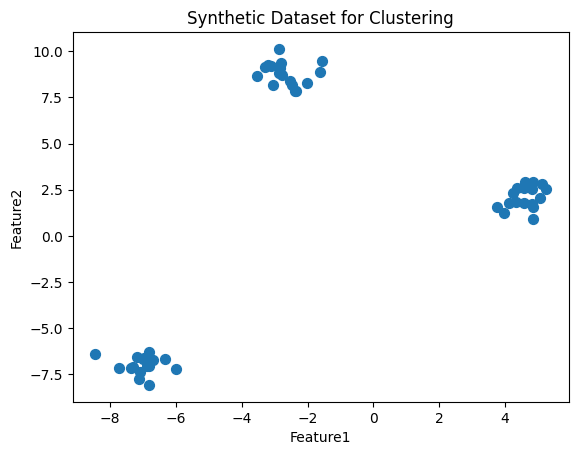

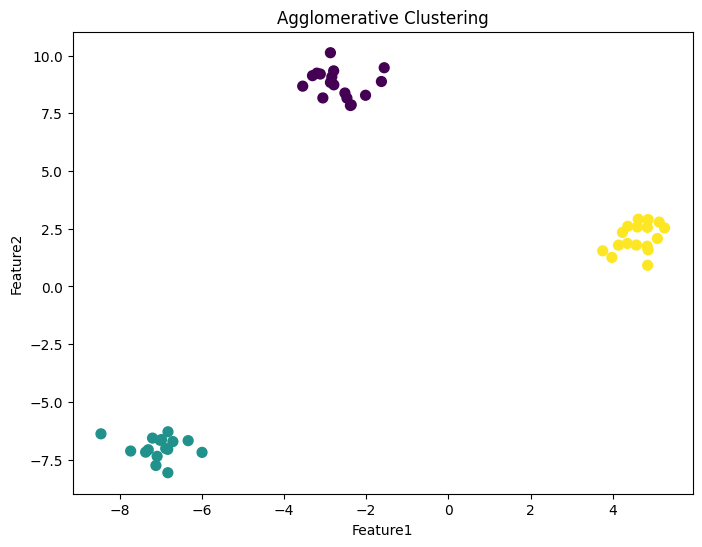

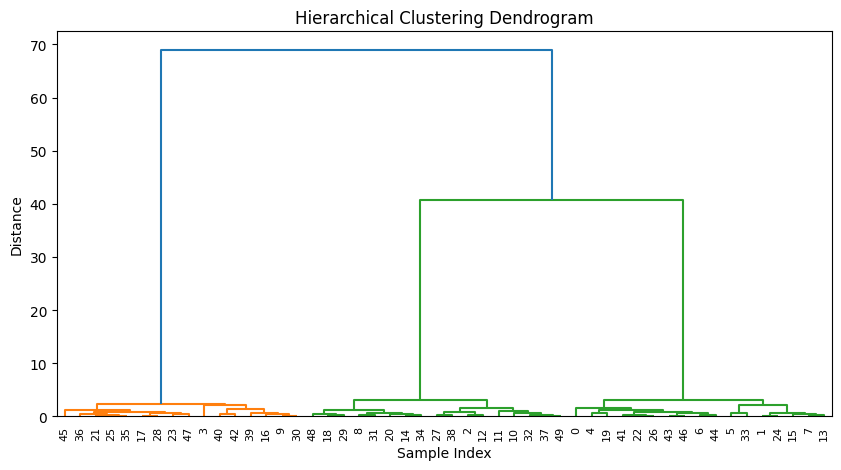

Cluster labels assigned to each data point:
 [0 0 2 1 0 0 0 0 2 1 2 2 2 0 2 0 1 1 2 0 2 1 0 1 0 1 0 2 1 2 1 2 2 0 2 1 1
 2 2 1 1 0 1 0 0 1 0 1 2 2]


In [2]:
# ==============================
# Hierarchical (Agglomerative) Clustering - Corrected
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Create synthetic dataset
X, y_true = make_blobs(n_samples=50, centers=3, cluster_std=0.60, random_state=42)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# 2. Visualize the dataset
plt.scatter(data['Feature1'], data['Feature2'], s=50)
plt.title("Synthetic Dataset for Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# 3. Hierarchical clustering (Agglomerative) - using 'metric' instead of 'affinity'
agg_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data['Cluster'] = agg_model.fit_predict(X)

# 4. Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# 5. Dendrogram
linked = linkage(X, method='ward')  # computes hierarchical clustering
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# 6. Print cluster labels
print("Cluster labels assigned to each data point:\n", data['Cluster'].values)
